In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from typing import Callable

In [48]:
def get_sigmoid(loc: float, sensitivity: float, gain: float) -> Callable[[np.ndarray], np.ndarray]:
    def sigmoid(x):
        return gain / (1 + np.exp(-(x - loc) / sensitivity))
    return sigmoid

In [54]:
short_tau = 10
long_tau = 200

In [55]:
freqs = np.arange(0, 10**3, 1)

In [82]:
short_filter = signal.TransferFunction([short_tau], [1, short_tau])
long_filter = signal.TransferFunction([long_tau], [1, long_tau])
_, mag_long, phase_long = signal.bode(long_filter, freqs)
_, mag_short, phase_short = signal.bode(short_filter, freqs)
mag_long_abs = 10**(mag_long/20)
mag_short_abs = 10**(mag_short/20)

In [122]:
b, a = signal.butter(N=2, Wn=100, btype='highpass', analog=True)
butter_lowpass = signal.TransferFunction(b, a)
_, mag_butter_lowpass, _ = signal.bode(butter_lowpass, freqs)
mag_butter_lowpass_abs = 10**(mag_butter_lowpass/20)

In [115]:
summed = mag_long_abs + mag_short_abs

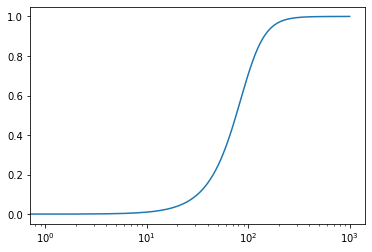

In [116]:
plt.figure()
# plt.semilogx(freqs, summed)
plt.semilogx(freqs, mag_butter_lowpass_abs)
# plt.semilogx(freqs, mag_short_abs)
plt.show()

In [118]:
dt = 0.01
t = np.arange(0, 10, dt)

In [119]:
y = np.sin(t)

In [ ]:
b, a = signal.butter(N=2, Wn=0.5, btype='highpass')

In [125]:
filtered = signal.lfilter(b, a, y)

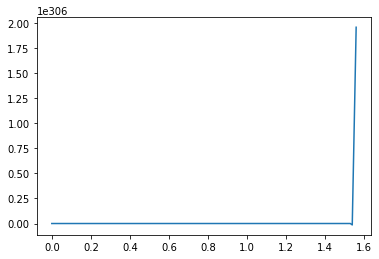

In [126]:
plt.figure()
plt.plot(t, filtered)
plt.show()